(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 데이터 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 합종연횡: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

- `axis=0`: 합종 결합

In [2]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [4]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [5]:
pd.concat([df1, df2, df3]) # axis=0 이 기본값

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- `axis=1`: 연횡 결합

In [6]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [7]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [8]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [10]:
df4.reindex(df1.index)

,B,D,F
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,B2,D2,F2
3,B3,D3,F3


In [11]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 합병: `pd.merge()` 함수

`pd.merge()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [12]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [13]:
left

,key,lval
0,foo,1
1,foo,2


In [14]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [15]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [16]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [17]:
left

,key,lval
0,foo,1
1,bar,2


In [18]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
        
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [19]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [20]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [21]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [22]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [23]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [24]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키워드 인자**

In [25]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [26]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [27]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [28]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [29]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [30]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [31]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [32]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [33]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [34]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 합병: `DataFrame.join()` 메서드

인덱스를 기준으로 두 개의 데이터프레임을 합병할 때 사용한다.

In [35]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [36]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [37]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


아래와 같이 `pd.merge()` 함수를 이용한 결과와 동일하다.

In [38]:
pd.merge(left, right, left_index=True, right_index=True, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`pd.merge()` 함수의 키워드 인자를 동일하게 사용할 수 있다.

- `how='outer'`

In [39]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


아래 코드가 동일한 결과를 낸다.

In [40]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- `how='inner'`

In [41]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


아래 코드가 동일한 결과를 낸다.

In [42]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## 그룹화: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**<font size='2'>Splitting</font>: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**<font size='2'>Applying</font>: 그룹별로 함수 적용
- **조합**<font size='2'>Combining</font>: 그룹별 함수 적용 결과를 취합하여 새로운 데이터프레임/시리즈 생성

In [43]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.305054,-1.026028
1,bar,one,0.205335,0.431831
2,foo,two,2.018089,1.276030
3,bar,three,-1.186311,1.782188
4,foo,two,0.946516,-0.229903
5,bar,two,-0.910258,1.058586
6,foo,one,-0.138771,0.020489
7,bar,three,0.286481,-1.753151


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | 경우의 수 |
| :---: | :---: |
| `bar`(4) | 1 |
| `foo`(4) | 1 |

In [44]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-1.604753,1.519453
foo,3.130887,0.040589


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성

| `A`(사용횟수) | `B`(사용횟수) | 경우의 수 |
| :---: | :---: | :---: |
| `bar`(4) | `one`(1), `three`(2), `two`(1) | 3 |
| `foo`(4) | `one`(2), `two`(2) | 2 |

In [45]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.205335  0.431831
    three -0.899830  0.029037
    two   -0.910258  1.058586
foo one    0.166283 -1.005539
    two    2.964605  1.046128

**그룹 확인**

- `for` 반복문 활용 

In [46]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  0.205335  0.431831
('bar', 'three')
     A      B         C         D
3  bar  three -1.186311  1.782188
7  bar  three  0.286481 -1.753151
('bar', 'two')
     A    B         C         D
5  bar  two -0.910258  1.058586
('foo', 'one')
     A    B         C         D
0  foo  one  0.305054 -1.026028
6  foo  one -0.138771  0.020489
('foo', 'two')
     A    B         C         D
2  foo  two  2.018089  1.276030
4  foo  two  0.946516 -0.229903


- `get_group()` 메서드

In [47]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,0.205335,0.431831


In [48]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,-1.186311,1.782188
7,bar,three,0.286481,-1.753151


- `groups` 속성

In [49]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [50]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one     0.205335   0.431831    1
     three  -1.186311   1.782188    1
             0.286481  -1.753151    1
     two    -0.910258   1.058586    1
foo  one    -0.138771   0.020489    1
             0.305054  -1.026028    1
     two     0.946516  -0.229903    1
             2.018089   1.276030    1
dtype: int64

- `nunique` 속성

In [51]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [52]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one    0.205335  0.431831
    three -0.899830  0.029037
    two   -0.910258  1.058586
foo one    0.166283 -1.005539
    two    2.964605  1.046128

In [53]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one    0.166283 -1.005539
bar one    0.205335  0.431831
foo two    2.964605  1.046128
bar three -0.899830  0.029037
    two   -0.910258  1.058586

In [54]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산**

In [55]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,0.286481,1.782188
foo,2.018089,1.276030


In [56]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one    0.205335  0.431831
    three  0.286481  1.782188
    two   -0.910258  1.058586
foo one    0.305054  0.020489
    two    2.018089  1.276030

In [57]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,-0.401188,0.379863
foo,0.782722,0.010147


In [58]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    0.205335  0.431831
    three -0.449915  0.014519
    two   -0.910258  1.058586
foo one    0.083141 -0.502769
    two    1.482302  0.523064

In [59]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [60]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

In [61]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0 -0.401188  0.756380 -1.186311 -0.979272 -0.352462  0.225622   
foo   4.0  0.782722  0.936354 -0.138771  0.194098  0.625785  1.214409   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.286481   4.0  0.379863  1.525301 -1.753151 -0.114415  0.745208   
foo  2.018089   4.0  0.010147  0.954611 -1.026028 -0.428934 -0.104707   

                         
          75%       max  
A                        
bar  1.239486  1.782188  
foo  0.334374  1.276030

In [62]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.205335       NaN  0.205335  0.205335  0.205335  0.205335   
    three   2.0 -0.449915  1.041422 -1.186311 -0.818113 -0.449915 -0.081717   
    two     1.0 -0.910258       NaN -0.910258 -0.910258 -0.910258 -0.910258   
foo one     2.0  0.083141  0.313831 -0.138771 -0.027815  0.083141  0.194098   
    two     2.0  1.482302  0.757717  0.946516  1.214409  1.482302  1.750196   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.205335   1.0  0.431831       NaN  0.431831  0.431831  0.431831   
    three  0.286481   2.0  0.014519  2.499862 -1.753151 -0.869316  0.014519   
    two   -0.910258   1.0  1.058586       NaN  1.058586  1.058586  1.058586   
foo one    0.305054   2.0 -0.502769  0.739999 -1.026028 -0.764399 -0.502769   
    two    2.018089   2.0  0.523064  1.064855 -0.229903  0.146581  0.523064   

                               
                75%       max  
A   B                          
bar one    0.431831  0.431831  
    three  0.898353  1.782188  
    two    1.058586  1.058586  
foo one   -0.241140  0.020489  
    two    0.899547  1.276030

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [63]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [64]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [65]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.363168  0.413617
      two    -0.974199  0.401425
baz   one    -0.879002 -0.120605
      two    -0.269523  0.943358
foo   one    -0.371793  0.104979
      two     0.317785  1.444735
qux   one    -2.080407  1.343112
      two    -1.377565  1.438669

In [66]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.363168  0.413617
      two    -0.974199  0.401425
baz   one    -0.879002 -0.120605
      two    -0.269523  0.943358

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [67]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.363168
               B    0.413617
       two     A   -0.974199
               B    0.401425
baz    one     A   -0.879002
               B   -0.120605
       two     A   -0.269523
               B    0.943358
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [68]:
stacked.unstack()

A         B
first second                    
bar   one    -1.363168  0.413617
      two    -0.974199  0.401425
baz   one    -0.879002 -0.120605
      two    -0.269523  0.943358

In [69]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.363168 -0.974199
      B  0.413617  0.401425
baz   A -0.879002 -0.269523
      B -0.120605  0.943358

In [70]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.363168 -0.879002
       B  0.413617 -0.120605
two    A -0.974199 -0.269523
       B  0.401425  0.943358

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [71]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.773860,-0.407661
1,one,B,foo,-0.090798,0.974621
2,two,C,foo,-1.771676,1.581502
3,three,A,bar,1.236385,0.689159
4,one,B,bar,0.062869,0.210112
5,one,C,bar,-1.229821,-1.278835
6,two,A,foo,1.298453,-0.782134
7,three,B,foo,-2.400533,-1.110220
8,one,C,foo,0.537828,-0.016877
9,one,A,bar,-0.479610,-0.983785


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [72]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.479610 -0.773860
      B  0.062869 -0.090798
      C -1.229821  0.537828
three A  1.236385       NaN
      B       NaN -2.400533
      C -0.859253       NaN
two   A       NaN  1.298453
      B -0.002048       NaN
      C       NaN -1.771676

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [73]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [74]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00     26
2012-01-01 00:00:01    475
2012-01-01 00:00:02    401
2012-01-01 00:00:03    266
2012-01-01 00:00:04    308
                      ... 
2012-01-01 00:01:35      6
2012-01-01 00:01:36    477
2012-01-01 00:01:37    494
2012-01-01 00:01:38     82
2012-01-01 00:01:39    438
Freq: S, Length: 100, dtype: int64

In [75]:
ts.resample("10S").sum()

2012-01-01 00:00:00    2791
2012-01-01 00:00:10    2113
2012-01-01 00:00:20    2363
2012-01-01 00:00:30    2361
2012-01-01 00:00:40    2325
2012-01-01 00:00:50    2411
2012-01-01 00:01:00    2692
2012-01-01 00:01:10    2634
2012-01-01 00:01:20    3088
2012-01-01 00:01:30    3096
Freq: 10S, dtype: int64

In [76]:
ts.resample("1Min").sum()

2012-01-01 00:00:00    14364
2012-01-01 00:01:00    11510
Freq: T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [77]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06    0.306277
2012-03-07   -0.598828
2012-03-08   -0.214205
2012-03-09   -0.721789
2012-03-10    0.496100
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00    0.306277
2012-03-07 00:00:00+00:00   -0.598828
2012-03-08 00:00:00+00:00   -0.214205
2012-03-09 00:00:00+00:00   -0.721789
2012-03-10 00:00:00+00:00    0.496100
Freq: D, dtype: float64

Converting between time span representations:

In [78]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [79]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.883583
2012-02-29    0.163852
2012-03-31    0.817292
2012-04-30   -0.899811
2012-05-31    0.995781
Freq: M, dtype: float64

In [80]:
ps = ts.to_period()
ps

2012-01   -1.883583
2012-02    0.163852
2012-03    0.817292
2012-04   -0.899811
2012-05    0.995781
Freq: M, dtype: float64

In [81]:
ps.to_timestamp()

2012-01-01   -1.883583
2012-02-01    0.163852
2012-03-01    0.817292
2012-04-01   -0.899811
2012-05-01    0.995781
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [82]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [83]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.959155
1990Q2   -1.028456
1990Q3   -1.302228
1990Q4   -0.883494
1991Q1   -1.995117
1991Q2   -0.085012
1991Q3   -0.201434
1991Q4    1.416875
1992Q1    0.036021
1992Q2    1.366226
1992Q3   -0.111209
1992Q4   -0.978479
1993Q1   -0.213304
1993Q2    0.839963
1993Q3   -0.671009
1993Q4   -0.733019
1994Q1    0.079194
1994Q2    1.318127
1994Q3   -1.498737
1994Q4    0.999803
1995Q1    0.200932
1995Q2   -0.036628
1995Q3   -1.546669
1995Q4   -1.068876
1996Q1    0.125223
1996Q2    1.113946
1996Q3   -0.136632
1996Q4   -1.829181
1997Q1    0.710470
1997Q2    0.441136
1997Q3   -1.264207
1997Q4    0.951037
1998Q1   -0.942419
1998Q2    0.451126
1998Q3    1.126582
1998Q4    0.341863
1999Q1    0.087526
1999Q2   -1.351911
1999Q3   -0.017569
1999Q4    0.356485
2000Q1    1.219240
2000Q2    1.001394
2000Q3    0.589857
2000Q4    0.169063
Freq: Q-NOV, dtype: float64

In [84]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [85]:
ts.head()

1990-03-01 09:00    0.959155
1990-06-01 09:00   -1.028456
1990-09-01 09:00   -1.302228
1990-12-01 09:00   -0.883494
1991-03-01 09:00   -1.995117
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [86]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [87]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [88]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [89]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [90]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [91]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

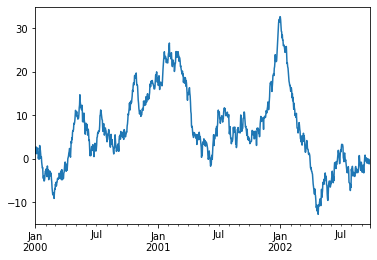

In [92]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

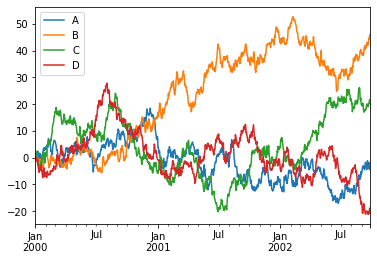

In [93]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [94]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [95]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.979118,0.329400,0.044357,-0.533561
1,2000-01-02,1.269218,1.783381,1.519387,0.273881
2,2000-01-03,1.404339,1.756406,0.359010,0.139851
3,2000-01-04,1.390422,0.082121,1.904601,-0.071930
4,2000-01-05,2.262146,-0.011478,2.230144,-0.134033
...,...,...,...,...,...
995,2002-09-22,-4.101468,44.575337,19.911831,-20.354470
996,2002-09-23,-1.770783,44.311257,20.701065,-20.882252
997,2002-09-24,-3.383304,45.315278,21.327038,-19.146517
998,2002-09-25,-4.321428,46.019923,21.723059,-19.203105


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [96]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [97]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.979118,0.329400,0.044357,-0.533561
1,2000-01-02,1.269218,1.783381,1.519387,0.273881
2,2000-01-03,1.404339,1.756406,0.359010,0.139851
3,2000-01-04,1.390422,0.082121,1.904601,-0.071930
4,2000-01-05,2.262146,-0.011478,2.230144,-0.134033
...,...,...,...,...,...
995,2002-09-22,-4.101468,44.575337,19.911831,-20.354470
996,2002-09-23,-1.770783,44.311257,20.701065,-20.882252
997,2002-09-24,-3.383304,45.315278,21.327038,-19.146517
998,2002-09-25,-4.321428,46.019923,21.723059,-19.203105
